In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

data=pd.read_csv('Data_sets/carTrainData.csv')

In [3]:

data.head()

,V1,V2,V3,V4,V5,V6,V7
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 7 columns):
V1    1428 non-null object
V2    1428 non-null object
V3    1428 non-null object
V4    1428 non-null object
V5    1428 non-null object
V6    1428 non-null object
V7    1428 non-null object
dtypes: object(7)
memory usage: 78.2+ KB


In [5]:
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'high' 'med'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [6]:
for i in data.columns:
    print(data[i].value_counts())
    print()

high     361
vhigh    357
med      355
low      355
Name: V1, dtype: int64

med      365
vhigh    358
low      353
high     352
Name: V2, dtype: int64

2        362
5more    362
4        353
3        351
Name: V3, dtype: int64

2       483
4       475
more    470
Name: V4, dtype: int64

big      479
med      479
small    470
Name: V5, dtype: int64

low     483
med     477
high    468
Name: V6, dtype: int64

unacc    1013
acc       307
good       57
vgood      51
Name: V7, dtype: int64



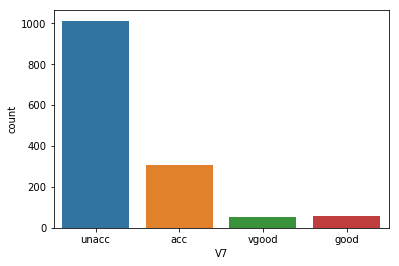

In [7]:
sns.countplot(data['V7'])

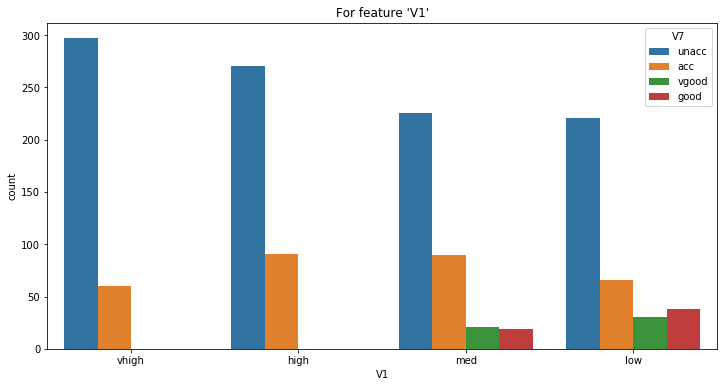

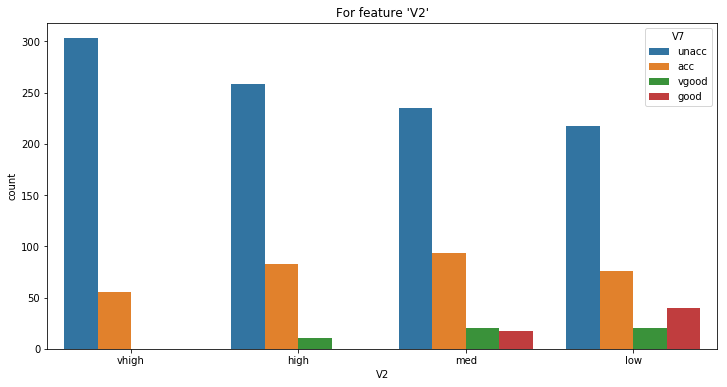

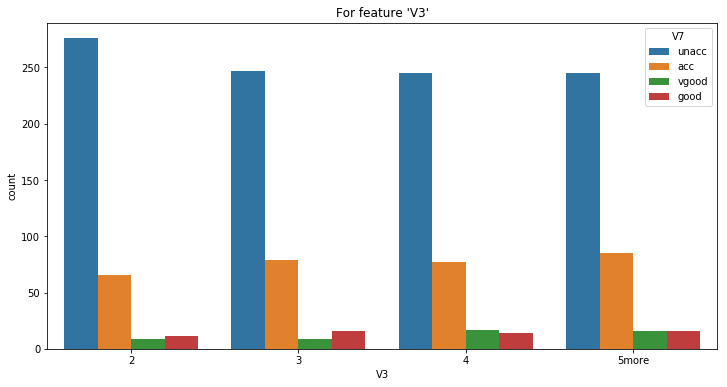

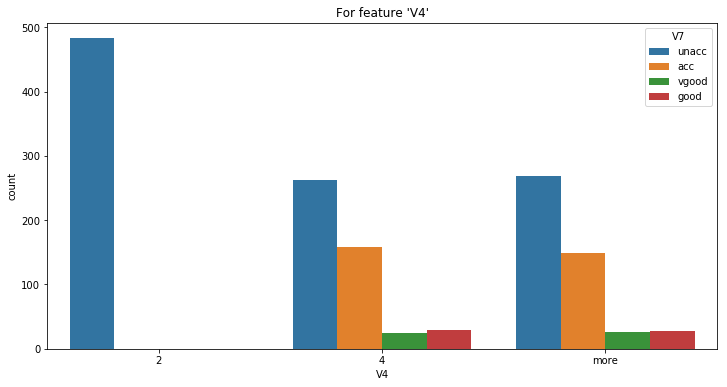

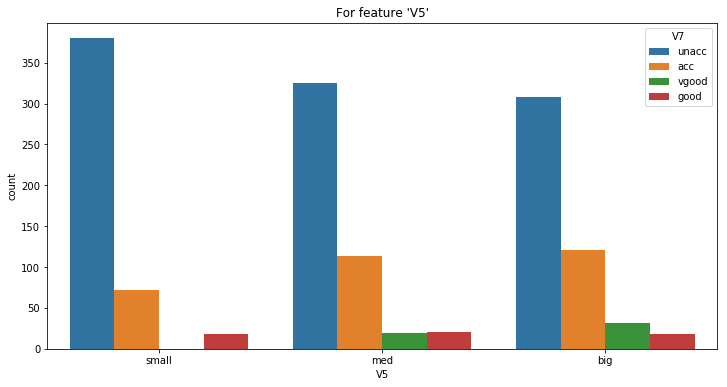

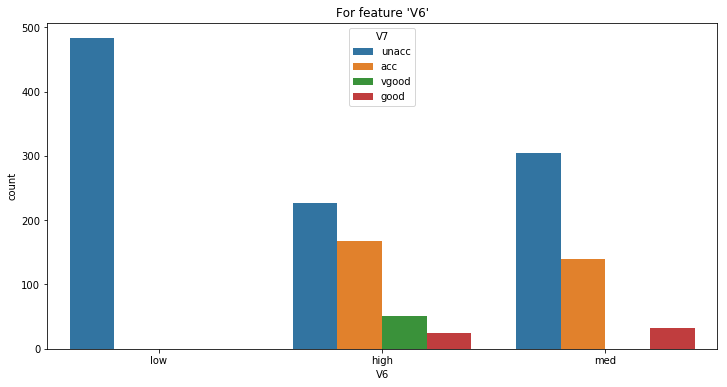

In [8]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['V7'])

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:

le=LabelEncoder()

In [11]:

for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [12]:

data.head()

,V1,V2,V3,V4,V5,V6,V7
0,3,3,0,0,2,1,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


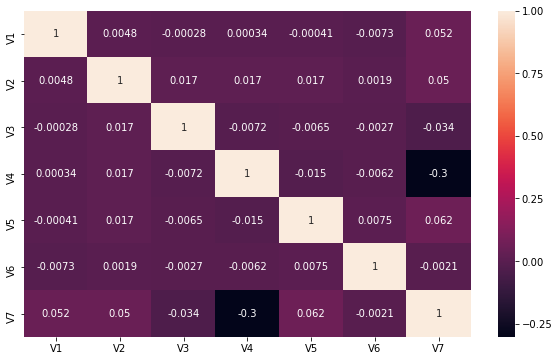

In [13]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [14]:
X=data[data.columns[:-1]]
y=data['V7']

In [15]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [19]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
pred=logreg.predict(X_test)

In [21]:
logreg.score(X_test,y_test)

0.68764568764568768

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [24]:
from sklearn.metrics import f1_score

In [25]:
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
print(f1_score(y_test, rfc.predict(X_test), average='macro'))

0.939393939394
0.901818330072


In [26]:
print(classification_report(y_test,rfc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.86      0.89      0.88       103
          1       1.00      0.71      0.83        21
          2       0.96      0.98      0.97       290
          3       1.00      0.87      0.93        15

avg / total       0.94      0.94      0.94       429



In [27]:
from sklearn.grid_search import GridSearchCV

/home/abhiraj/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/abhiraj/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [28]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [29]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [30]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=51, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 5, 10, 20], 'max_features': [2, 4, 6, 'auto'], 'max_leaf_nodes': [2, 3, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [31]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 4, 'max_leaf_nodes': None}
0.972972972972973


In [32]:
print(X.columns)
print(rfc.feature_importances_)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6'], dtype='object')
[ 0.17728997  0.16171469  0.07601067  0.27037094  0.07358821  0.24102551]


In [33]:
from sklearn.model_selection import learning_curve

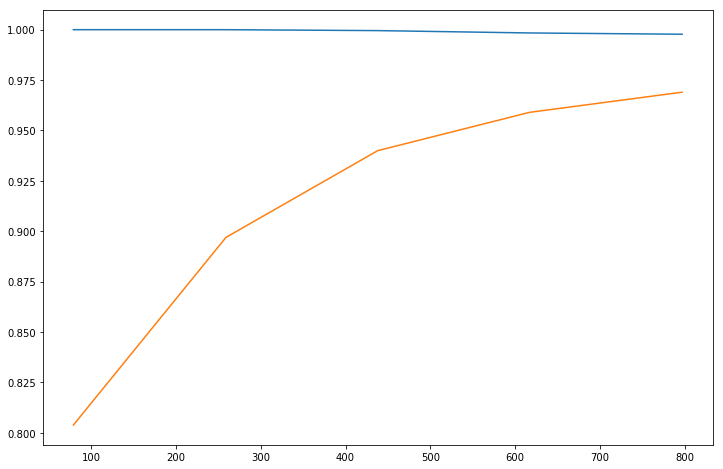

In [34]:
lc=learning_curve(RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=6,max_depth=10,random_state=51,
                                             max_leaf_nodes=None,n_jobs=-1,),X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [35]:
from sklearn.model_selection import validation_curve

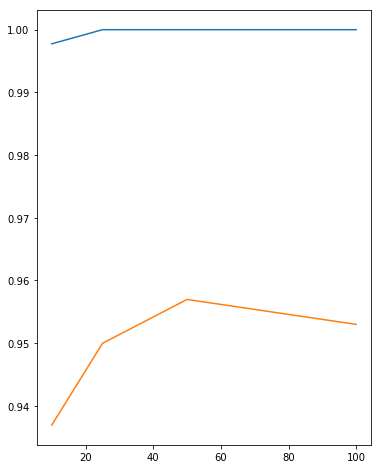

In [36]:
param_range=[10,25,50,100]
curve=validation_curve(rfc,X_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

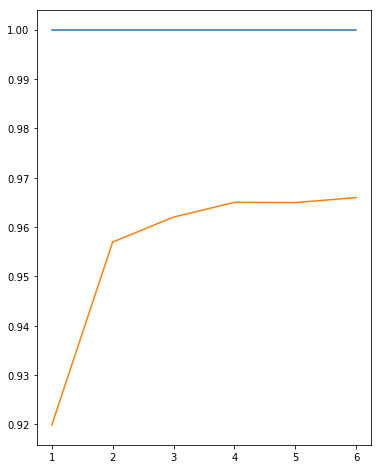

In [37]:
param_range=range(1,len(X.columns)+1)
curve=validation_curve(RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),X_train,y_train,cv=5,
    param_name='max_features',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cnf_matrix=confusion_matrix(y_test,rfc.predict(X_test))
np.set_printoptions(precision=2)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    

In [40]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[ 92   0  11   0]
 [  6  15   0   0]
 [  7   0 283   0]
 [  2   0   0  13]]


In [41]:

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data ,normalize= True , title= 'Normalized Confusion Matrix')

Normalized confusion matrix
[[ 0.89  0.    0.11  0.  ]
 [ 0.29  0.71  0.    0.  ]
 [ 0.02  0.    0.98  0.  ]
 [ 0.13  0.    0.    0.87]]


In [42]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=y_test,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[ 92   0  11   0]
 [  6  15   0   0]
 [  7   0 283   0]
 [  2   0   0  13]]


In [43]:

plt.figure()
plot_confusion_matrix(cnf_matrix, classes= y_test,normalize= True , title= 'Normalized Confusion Matrix')

Normalized confusion matrix
[[ 0.89  0.    0.11  0.  ]
 [ 0.29  0.71  0.    0.  ]
 [ 0.02  0.    0.98  0.  ]
 [ 0.13  0.    0.    0.87]]


In [44]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=y_train,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[ 92   0  11   0]
 [  6  15   0   0]
 [  7   0 283   0]
 [  2   0   0  13]]


In [45]:

plt.figure()
plot_confusion_matrix(cnf_matrix, classes= y_train,normalize= True , title= 'Normalized Confusion Matrix')

Normalized confusion matrix
[[ 0.89  0.    0.11  0.  ]
 [ 0.29  0.71  0.    0.  ]
 [ 0.02  0.    0.98  0.  ]
 [ 0.13  0.    0.    0.87]]


In [46]:
plt.show()